**Trabalho Python Facef - André Borges [22290]**

**Conjunto de dados de Coimbra do câncer de mama.**

**Resumo:** 

As características clínicas foram observadas ou medidas em 64 pacientes com câncer de mama e 52 controles saudáveis. Dando um total de 116 instâncias.

**Informações sobre os atributos:**

**Atributos quantitativos:**

Idade (anos)

IMC (kg / m2)

Glicose (mg / dL)

Insulina (µU / mL)

HOMA

Leptina (ng / mL)

Adiponectina (µg / mL)

Resistina (ng / mL)

MCP-1 (pg / dL)

**Classificadores:**

1 = Pacientes saudáveis

2 = Pacientes com câncer de mama

**Relatório:**

Dos 116 casos analisados, foi possivel obter alguns dados:

- Os pacientes mais velhos tinham 89 anos.

- Os pacientes mais novos tinham 24 anos.

- A média de idade dos pacientes era de 56 anos.

- 52 pacientes eram saudáveis.

- 64 pacientes tinha câncer de mama.

In [ ]:
# importar Base de Dados
from google.colab import files
uploaded = files.upload()

In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# importando o arquivo
df = pd.read_csv('cancer-mama.csv', sep=',')
df.head()

,Idade,IMC,Glicose,Insulina,HOMA,Leptina,Adiponectina,Resistina,MCP-1,Classification
0,48,23.500000,70,2707.0,0.467409,8.8071,9.702400,7.99585,417114.00,1
1,83,20.690495,92,3115.0,0.706897,8.8438,5.429285,4.06405,468786.00,1
2,82,23.124670,91,4498.0,1.009651,17.9393,22.432040,9.27715,554697.00,1
3,68,21.367521,77,3226.0,0.612725,9.8827,7.169560,12766.00000,928.22,1
4,86,21.111111,92,3549.0,0.805386,6.6994,4.819240,10.57635,773.92,1


In [2]:
print(df.shape)

(116, 10)


In [3]:
print(df.describe())

            Idade           IMC     Glicose      Insulina        HOMA       Leptina  Adiponectina     Resistina         MCP-1  Classification
count  116.000000    116.000000  116.000000    116.000000  116.000000    116.000000    116.000000    116.000000  1.160000e+02      116.000000
mean    57.301724    269.796550   97.793103   7007.421466    2.694988   4491.163304     10.180874    275.740552  3.617557e+05        1.551724
std     16.112766   2608.785026   22.525162   9229.562279    3.642043  12448.134562      6.843341   1683.914490  3.249862e+05        0.499475
min     24.000000     18.370000   60.000000      2.540000    0.467409      4.470000      1.656020      3.210000  6.361000e+01        1.000000
25%     45.000000     22.973205   85.750000     11.017500    0.917966     13.575000      5.474282      6.913087  7.384950e+02        1.000000
50%     56.000000     27.662416   92.000000   4401.500000    1.380939     25.370800      8.352692     11.230025  3.560960e+05        2.000000
75%   

In [4]:
print(df.groupby('Classification').size())

Classification
1    52
2    64
dtype: int64


####  Visualizando graficamente os dados

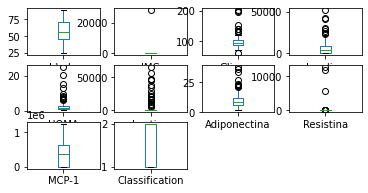

In [5]:
# gráfico de box and whisker
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

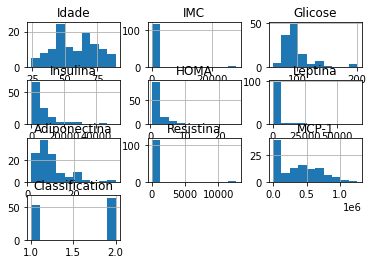

In [6]:
# histograma
df.hist()
plt.show()

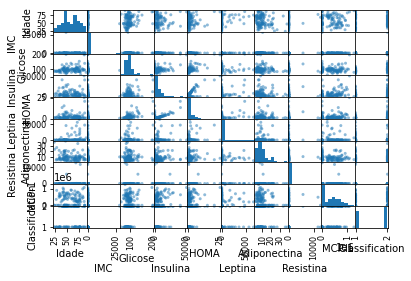

In [7]:
# gráfico de dispersão
scatter_matrix(df)
plt.show()


#### Conjunto de validação

In [8]:
# conjunto de validação
array = df.values
X = array[:,0:10]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [18]:
# métricas
seed = 7
scoring = 'balanced_accuracy'

#### Algorítmos que iremos rodar

* Regressão Logística (LR)
* Análise Linear Discriminante (LDA)
* K-vizinhos mais próximos (KNN)
* Árvores de Classificação (Decision Tree) e Regressão (CART)
* Gaussian Naive Bayes (NB)
* Support Vector Machines (SVM)

In [25]:
# algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.776190 (0.188459)
LDA: 0.707262 (0.168703)
KNN: 0.460357 (0.119611)
CART: 1.000000 (0.000000)
NB: 0.703214 (0.119928)
SVM: 0.500000 (0.000000)


#### Comparação grafica

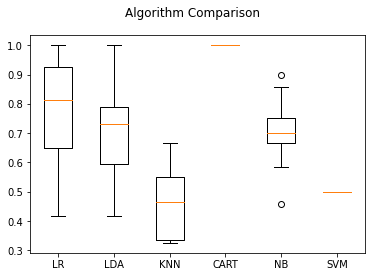

In [26]:
# comparar algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Gerando a Matriz de Confusão

In [27]:
# precisão do modelo no conjunto de validação
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[ 7  0]
 [ 0 17]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         7
         2.0       1.00      1.00      1.00        17

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

